In [1]:
%load_ext autoreload
%autoreload 2

In [51]:
import numpy as np
from simtk import unit
import molmodmt as m3t
import openpocket as opp
import nglview as nv
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, ConvexHull
from scipy.spatial.distance import euclidean as distance

## Índice
- ¿Qué son las alfa-esferas?
- ¿Cómo se clusterizan?

## 2D example

Random compact figure 2D made by hard discs. Adimensional lengths.

In [128]:
radius = 1.0 
n_discs = 20

positions = np.zeros(shape=(n_discs,2),dtype=float)

for ii in range(1, n_discs):
    done = False
    while done is False:
        disc_in_contact = np.random.randint(0,ii)
        angle = 2*np.pi*np.random.random()
        new_center = 2*radius*np.array([np.cos(angle), np.sin(angle)])+positions[disc_in_contact,:]
        done=True
        for jj in range(ii):
            dist= np.linalg.norm(positions[jj,:]-new_center)
            if dist < 2*radius:
                done=False
                break
        if done is True:
            positions[ii,:]=new_center


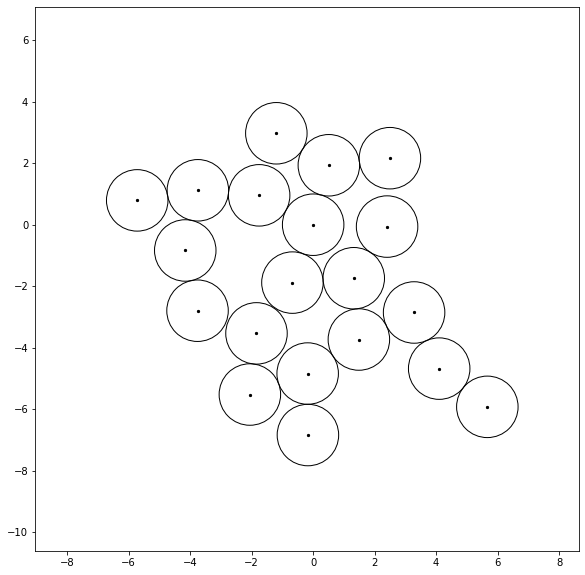

In [129]:
plt.rcParams["figure.figsize"] = (10,10)

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()


### Voronoi diagrams

Voronoi diagrams helps us to geometrically make a first a proach. We can determine those disks in the surface of the molecule and those in the core.

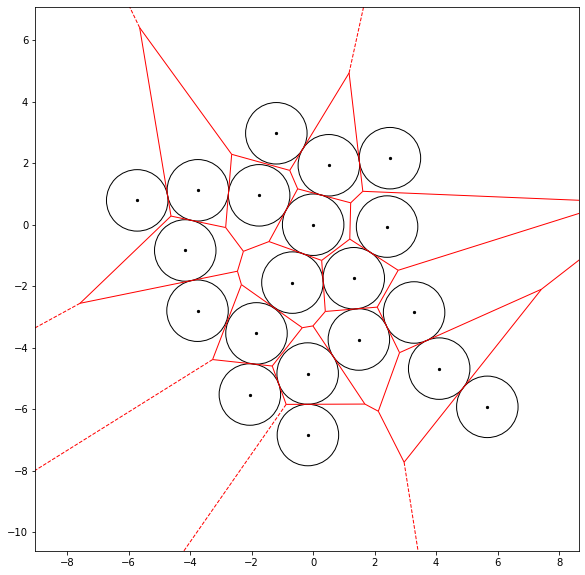

In [130]:
vor = Voronoi(positions, incremental=False)

voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r', s=4)

ax=plt.gca()
for ii in range(n_discs):
    x,y = positions[ii,:]
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

See also:    
https://www.daniweb.com/programming/computer-science/tutorials/520314/how-to-make-quality-voronoi-diagrams    
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.Voronoi.html    


## Dellanuy triangulation


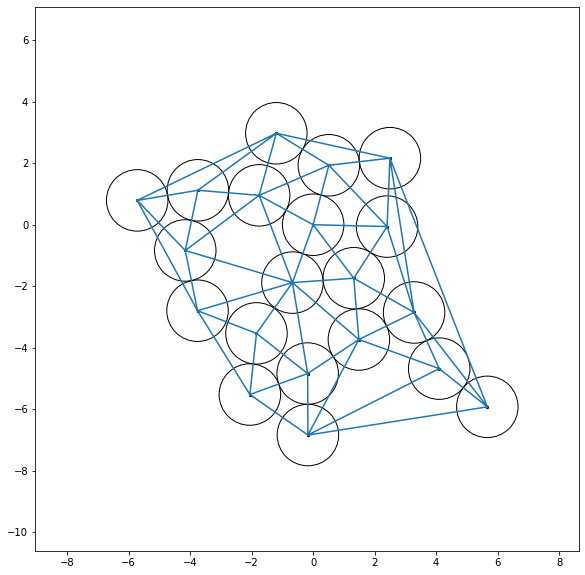

In [131]:
tri = Delaunay(positions)

plt.triplot(positions[:,0], positions[:,1], tri.simplices)

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

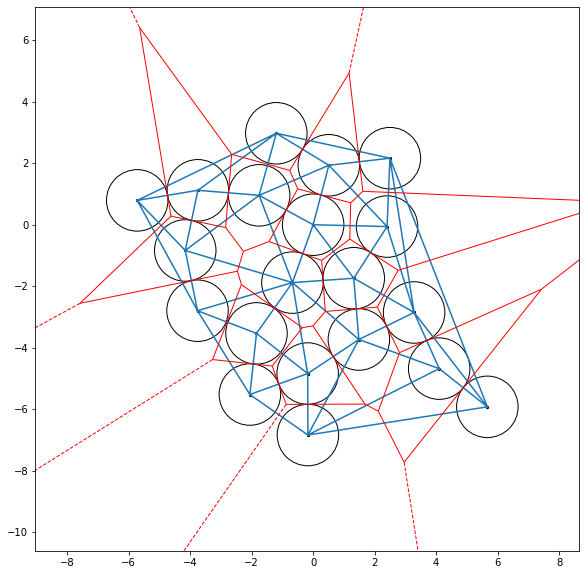

In [132]:
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r')

plt.triplot(positions[:,0], positions[:,1], tri.simplices)

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

Los vertice de las regiones de Voronoi son los circumcentros de los triangulos de Delanuy. Y las regiones infinitas (con alguno de sus lados infinitos) son precisamente los puntos exteriores en la teselación de Delanuy, cosa que vemos bien si atendemos a la convex hull:

## Convex Hull

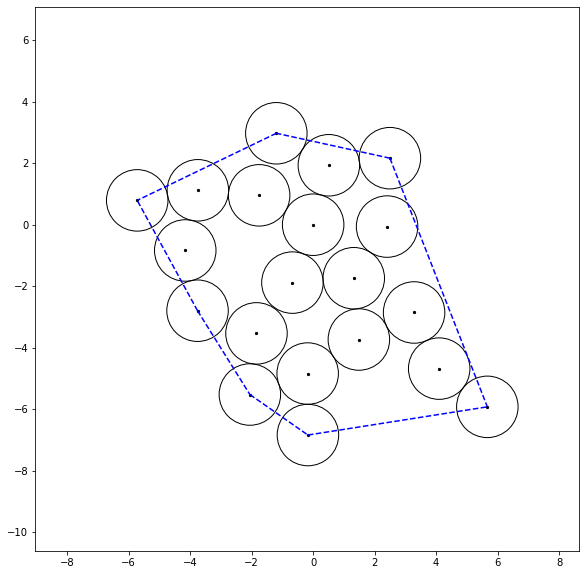

In [133]:
hull = ConvexHull(positions)

for simplex in hull.simplices:
    plt.plot(positions[simplex, 0], positions[simplex, 1], 'b--')

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

## Alpha spheres

Lets see the meaning of voronoi vertices:

In [134]:
vor.vertices

array([[-5.64361116,  6.40979543],
       [-2.65043775,  2.29022352],
       [-2.33363231, -1.94825308],
       ...,
       [ 0.39533403, -2.82167366],
       [ 2.08500608, -2.68071225],
       [ 2.76508956, -1.48238509]])

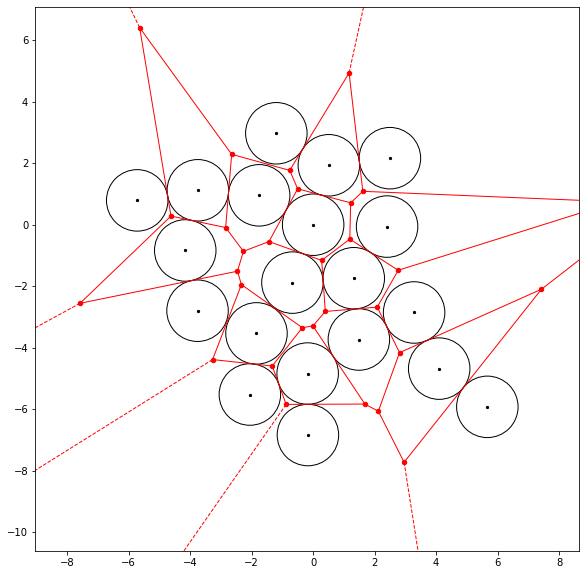

In [135]:
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r')

plt.scatter(vor.vertices[:,0], vor.vertices[:,1], s=20, c='red')

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

Cada vertice está a la misma distancia de tres puntos. Cada vertice esta formado necesariamente por tres celdas adyacentes. Cada una con un centro que estará en la alfa-circunferencia.

In [136]:
vor.vertices

array([[-5.64361116,  6.40979543],
       [-2.65043775,  2.29022352],
       [-2.33363231, -1.94825308],
       ...,
       [ 0.39533403, -2.82167366],
       [ 2.08500608, -2.68071225],
       [ 2.76508956, -1.48238509]])

In [137]:
vor.regions # cada region está cercada por unos vertices expresados por las siguientes listas

[[],
 [7, 5, 3, 4, 6],
 [7, 0, 1, 5],
 [-1, 6, 4, 2, 11],
 [-1, 6, 7, 0],
 [16, 14, 13, 12, 15],
 [14, 11, 2, 13],
 [16, -1, 11, 14],
 [16, -1, 9, 10, 15],
 [21, 18, 17, 19, 20],
 [18, 8, 3, 5, 1, 17],
 [19, -1, 0, 1, 17],
 [23, 9, 10, 22],
 [24, -1, 9, 23],
 [25, 20, 19, -1, 24],
 [30, 27, 26, 28, 29],
 [27, 21, 18, 8, 26],
 [28, 12, 13, 2, 4, 3, 8, 26],
 [30, 25, 20, 21, 27],
 [29, 22, 10, 15, 12, 28],
 [30, 25, 24, 23, 22, 29]]

In [138]:
vor.point_region

array([16, 17, 10, ...,  3,  6,  4])

In [139]:
n_vertices = vor.vertices.shape[0]
n_regions = len(vor.regions)
n_points = vor.npoints

points_of_vertex = [[] for ii in range(n_vertices)]
region_point={vor.point_region[ii]:ii for ii in range(n_points)}

for region_index in range(n_regions):
    region=vor.regions[region_index]
    if len(region)>0:
        point_index=region_point[region_index]
        for vertex_index in region:
            if vertex_index != -1:
                points_of_vertex[vertex_index].append(point_index)

In [140]:
points_of_vertex

[[5, 19, 8],
 [5, 2, 8],
 [17, 18, 1],
 [13, 2, 1],
 [13, 17, 1],
 [13, 5, 2],
 [13, 17, 19],
 [13, 5, 19],
 [2, 0, 1],
 [15, 12, 14],
 [15, 12, 6],
 [17, 18, 16],
 [7, 1, 6],
 [7, 18, 1],
 [7, 18, 16],
 [7, 15, 6],
 [7, 16, 15],
 [3, 2, 8],
 [3, 2, 0],
 [3, 8, 9],
 [3, 9, 10],
 [3, 0, 10],
 [12, 6, 11],
 [12, 14, 11],
 [14, 9, 11],
 [9, 10, 11],
 [4, 0, 1],
 [4, 0, 10],
 [4, 1, 6],
 [4, 6, 11],
 [4, 10, 11]]

In [141]:
n_alpha_circles = n_vertices
alpha_circle_centers = vor.vertices
alpha_circle_radius = [distance(vor.vertices[ii], positions[points_of_vertex[ii][0]]) for ii in range(n_vertices)]
alpha_circle_contacted_points = points_of_vertex

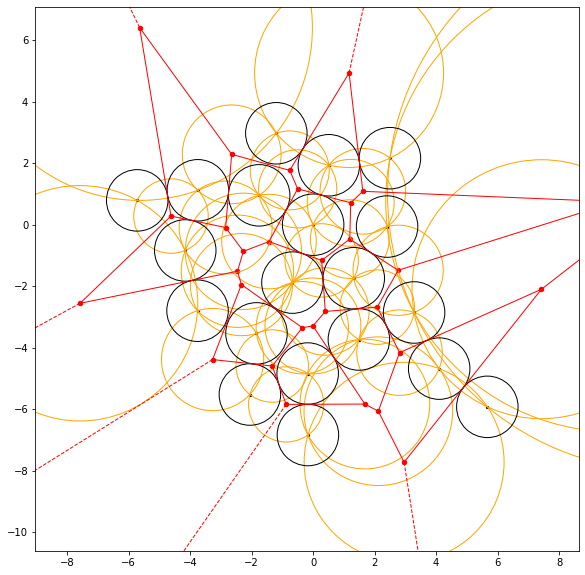

In [142]:
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r')

plt.scatter(vor.vertices[:,0], vor.vertices[:,1], s=20, c='red')

ax=plt.gca()

for ii in range(n_alpha_circles):
    ax.add_patch(plt.Circle(alpha_circle_centers[ii,:], radius= alpha_circle_radius[ii], color='orange', fill=False))

for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

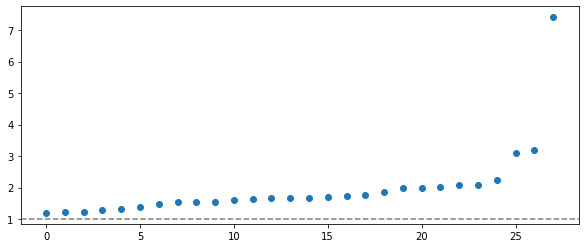

In [121]:
plt.rcParams["figure.figsize"] = (10,4)
plt.scatter(range(n_alpha_circles), np.sort(alpha_circle_radius))
plt.axhline(y=1, color='gray', linestyle='--')

## Notes
- What if the sphere radius are different? Repeat this with 4 classes of discs (4 different radius)
- The cavities need to allocate something inside. There is no reason to work with aisolated spheres of radius smaller than a disc (atom)

## 3D Alpha Spheres with OpenPocket

Lets define 4 points in space:

In [122]:
positions = np.zeros(shape=(4,3),dtype=float) * unit.angstroms

positions[0,:] = [-1.0, 2.0, 0.0] * unit.angstroms
positions[1,:] = [0.0, 2.0, 1.0] * unit.angstroms
positions[2,:] = [1.0, -2.0, 1.0] * unit.angstroms
positions[3,:] = [0.0, 1.0, 1.0] * unit.angstroms

We can obtain the set of alpha spheres defined by the coordinates of those 4 points. With the class `AlphSpheresSet` we can instance an object given an array of 3D coordinates:

In [123]:
alpha_spheres_set = opp.alpha_spheres.AlphaSpheresSet(positions)

The new object has some useful methods and attributes regarding the resultant alpha-spheres set. Lets check, for instance, the number of alpha spheres obtained with our 4 points:

In [ ]:
alpha_spheres_set.n_alpha_spheres

As expected, there is only one alpha sphere. Lets print out now the center and radius of the first and unique alpha sphere of the set:

In [ ]:
print('The only alpha-sphere has its center in {} and a radius of {} length.'.format(
    alpha_spheres_set.centers[0], alpha_spheres_set.radii[0]))

We can also wonder what points of the input points distribution are in contact with an specific alpha sphere of the set. In this case is trivial, since there is only 4 points and 1 alpha sphere:

In [ ]:
alpha_spheres_set.points_in_surface[0]

At last, lets see the sphere and the 4 points in a spatial representation:

In [ ]:
view = nv.NGLWidget()

for index in range(alpha_spheres_set.n_points):
    atom_coordinates = alpha_spheres_set.points[index,:]._value
    view.shape.add_sphere(list(atom_coordinates), [0.8,0.0,0.0], 0.2)

for index in range(alpha_spheres_set.n_alpha_spheres):
    sphere_coordinates = alpha_spheres_set.centers[index,:]._value
    sphere_radius = alpha_spheres_set.radii[index]._value
    view.shape.add_sphere(list(sphere_coordinates), [0.8,0.8,0.8], sphere_radius)
    
view

As we already knew, 4 points define a single alpha sphere by construction. Lets increase the number of points to 6 to see what happens:

In [ ]:
positions = np.zeros(shape=(6,3),dtype=float) * unit.angstroms

positions[0,:] = [-1.0, 2.0, 0.0] * unit.angstroms
positions[1,:] = [0.0, 2.0, 1.0] * unit.angstroms
positions[2,:] = [1.0, -2.0, 1.0] * unit.angstroms
positions[3,:] = [0.0, 1.0, 1.0] * unit.angstroms
positions[4,:] = [0.0, 0.0, 0.0] * unit.angstroms
positions[5,:] = [-1.0, -1.0, 0.0] * unit.angstroms

In [ ]:
positions

In [ ]:
alpha_spheres_set = opp.alpha_spheres.AlphaSpheresSet(positions)

In [ ]:
alpha_spheres_set.n_alpha_spheres

Now we have 4 alpha spheres. We can check centers and radii:

In [ ]:
alpha_spheres_set.centers

In [ ]:
alpha_spheres_set.radii

Lets visualize the points and resultant alpha spheres:

In [ ]:
alpha_spheres_set.view()

We can also visualize only a list of alpha sphere indices with their corresponding points in contact

In [ ]:
alpha_spheres_set.view([1,3])

What are the indices of the points shown in the above figure? What are the indices of the points in the surface of alpha spheres 1th and 3th?

In [ ]:
alpha_spheres_set.get_points_in_surfaces([1,3])